<h2>Import Tools</h2>

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

<h2>Get Data</h2>

In [41]:
df = pd.read_csv('retail_sales_dataset.csv')

<h2>Quick Overview</h2>

In [42]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [44]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [45]:
df.duplicated().sum()

0

In [46]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [47]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [48]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

<h3>functions: </h3>

In [49]:
# move a column in a table
def insert_column(df: pd.DataFrame, col_name: str, loc_index: int): 
    column = df.pop(col_name)
    df.insert(loc_index, col_name, column)

In [50]:
# delete Unncsessary Columns
try:
    df = df.drop(columns=['Customer ID', 'Transaction ID'])
except:
    print("Specified Columns were not found or are already deleted")

In [51]:
# Sort the values by Date
df.sort_values(by='Date', ignore_index=True, inplace=True)

In [52]:
# Add a Month Column
df['Month'] = pd.to_datetime(df['Date']).dt.month.apply(lambda x: calendar.month_abbr[x])

# Change the Month Column to categorical to save memory and support logical ordering 
df['Month'] = pd.Categorical(df['Month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Insert the month column next to the date column
insert_column(df, "Month", 1)

In [53]:
df['Quarter'] = df['Month'].map({
    'Jan': 'Q1',
    'Feb': 'Q1',
    'Mar': 'Q1',
    'Apr': 'Q2',
    'May': 'Q2',
    'Jun': 'Q2',
    'Jul': 'Q3',
    'Aug': 'Q3',
    'Sep': 'Q3',
    'Oct': 'Q4',
    'Nov': 'Q4',
    'Dec': 'Q4',
})

insert_column(df, "Quarter", 2)

In [54]:
# Add day of the Week Column 
df['Day of Week'] = pd.to_datetime(df['Date']).dt.dayofweek

insert_column(df, "Day of Week", 3)

In [55]:
df['Age Group'] = pd.cut(
    df['Age'],
    bins=[17, 26, 35, 45, 55, np.inf],
    labels=["18-26", "27-35", "36-45", "46-55", "56+"],
)

insert_column(df, "Age Group", 6)

In [56]:
print(f'Total revenue is {df['Total Amount'].sum() : .2f}') # revenue and amount are totally different
print(f'Total Quentity sold {df['Quantity'].sum() : .2f}')

Total revenue is  456000.00
Total Quentity sold  2514.00


In [57]:
print('starting date: ',df.Date.min())
print('ending date: ',df.Date.max())

starting date:  2023-01-01
ending date:  2024-01-01


In [58]:
sales_by_gender = df.groupby('Gender')[['Total Amount', 'Quantity']].sum().sort_values('Total Amount', ascending = False)
sales_by_gender.rename(columns={'Total Amount': 'Total Sales'}, inplace=True)
sales_by_gender["Total Sales"] = sales_by_gender["Total Sales"].map("{:,.0f}".format)
sales_by_gender["Quantity"] = sales_by_gender["Quantity"].map("{:,.0f}".format)
display(sales_by_gender)

,Total Sales,Quantity
Gender,,
Female,"232,840","1,298"
Male,"223,160","1,216"


<h2>Data Visualization</h2>

In [59]:
sns.set(style="whitegrid")

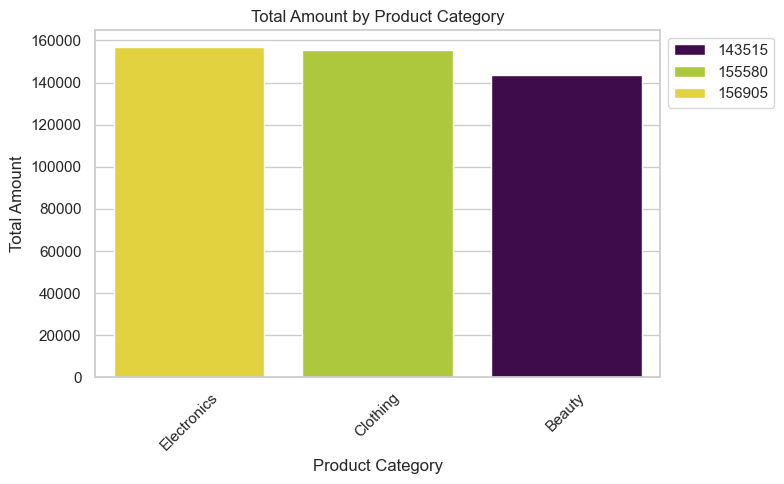

In [60]:
sales_by_product = df.groupby('Product Category')[['Total Amount']].sum().sort_values(by = 'Total Amount',ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(data=sales_by_product, x='Product Category', y='Total Amount', palette='viridis', hue = 'Total Amount')
plt.title('Total Amount by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

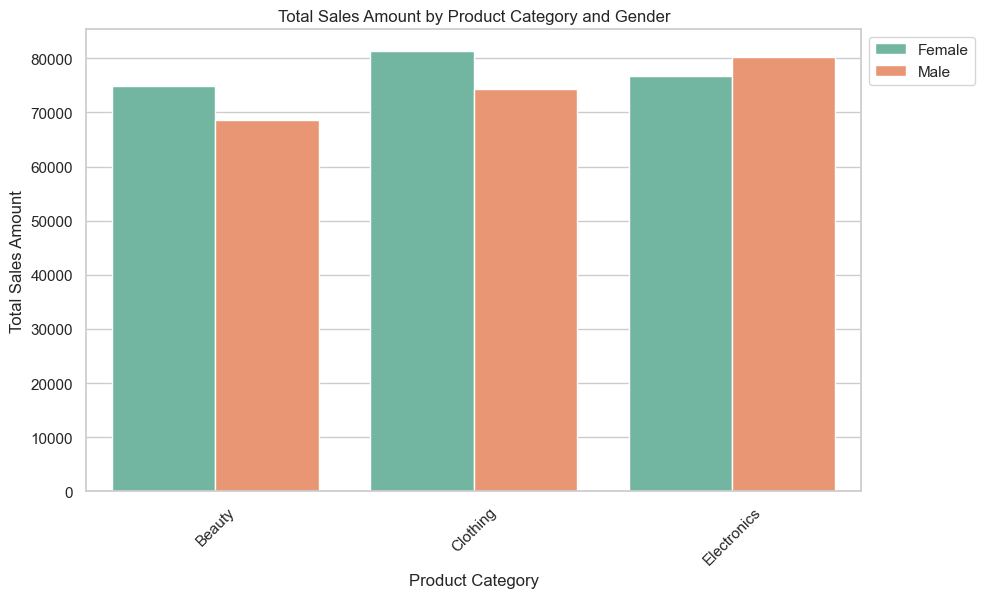

In [61]:
df1 = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='Product Category', y='Total Amount', hue='Gender', palette='Set2')

plt.title('Total Sales Amount by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.legend(bbox_to_anchor = (1,1))
plt.xticks(rotation=45)
plt.show()

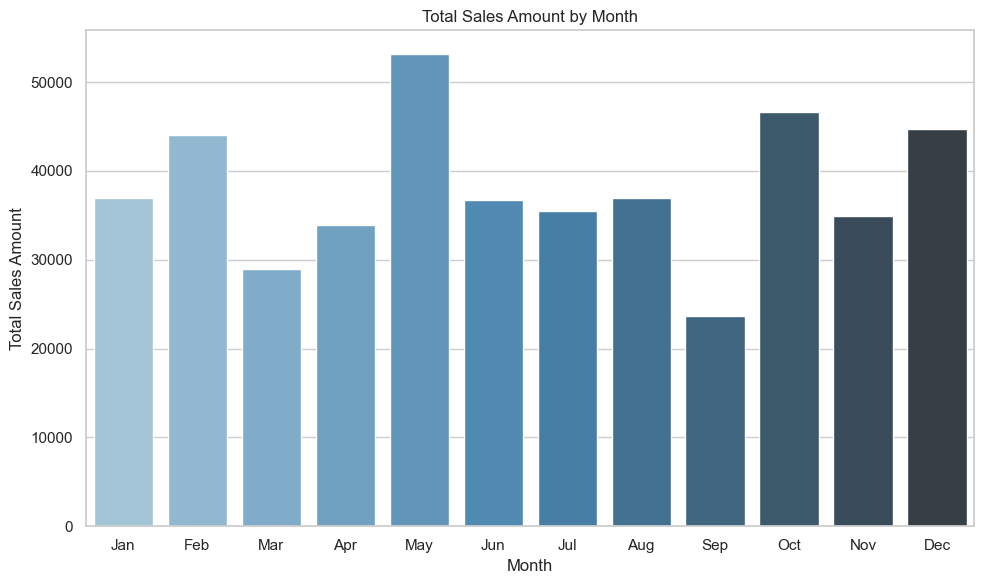

In [66]:
monthly_totals = df.groupby('Month', observed=True)['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_totals, x='Month', y='Total Amount', palette='Blues_d', hue = 'Month')

plt.title('Total Sales Amount by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

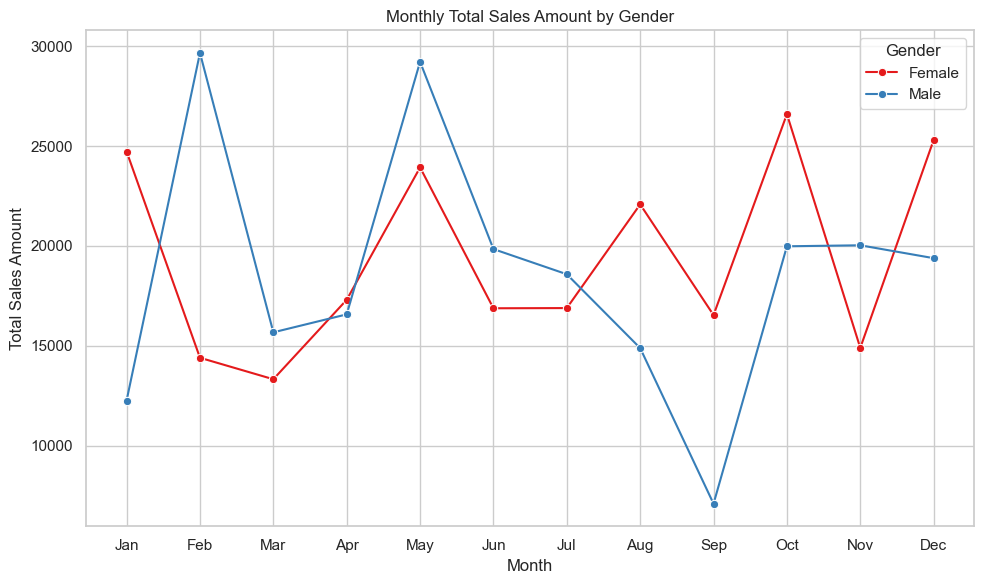

In [71]:
monthly_gender_totals = df.groupby(['Month', 'Gender'], observed=False)['Total Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_gender_totals, x='Month', y='Total Amount', hue='Gender', marker='o', palette='Set1')

plt.title('Monthly Total Sales Amount by Gender')
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

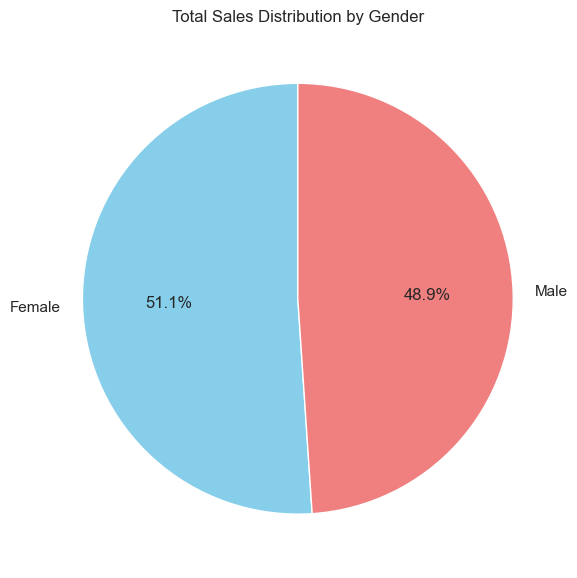

In [95]:
gender_totals = df.groupby('Gender')['Total Amount'].sum()

# Plot
plt.figure(figsize=(6, 6))
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Total Sales Distribution by Gender')
plt.tight_layout()
plt.show()

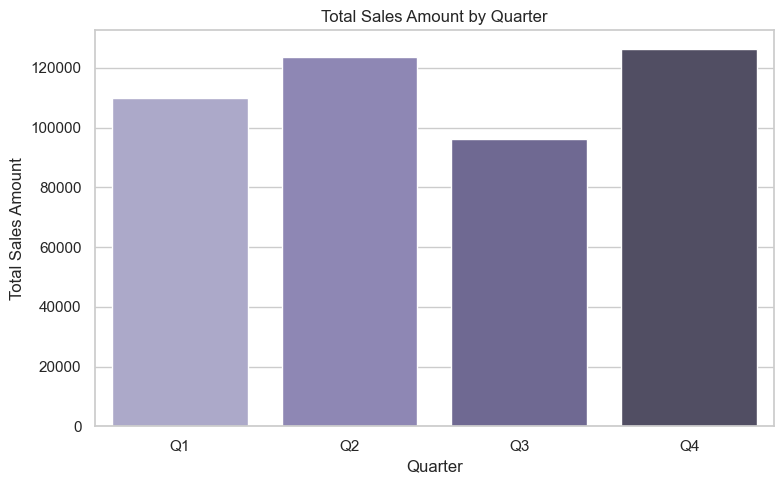

In [73]:
quarter_totals = df.groupby('Quarter')['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=quarter_totals, x='Quarter', y='Total Amount', palette='Purples_d', hue = 'Quarter')

plt.title('Total Sales Amount by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()


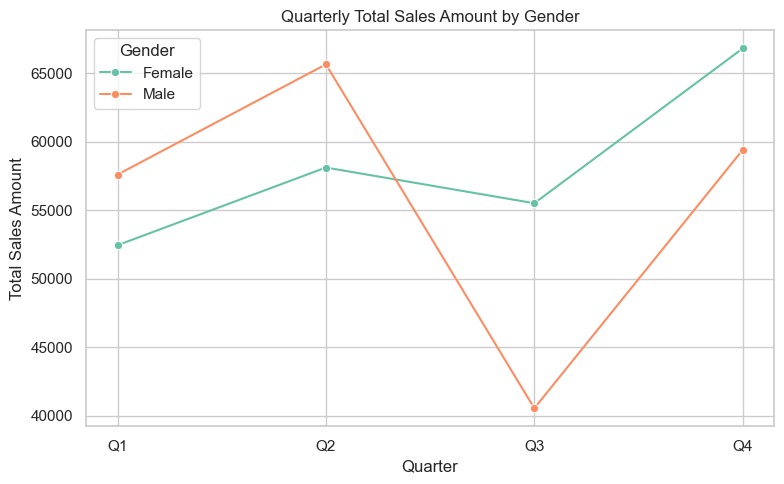

In [74]:
quarter_gender_totals = df.groupby(['Quarter', 'Gender'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=quarter_gender_totals, x='Quarter', y='Total Amount', hue='Gender', marker='o', palette='Set2')

plt.title('Quarterly Total Sales Amount by Gender')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

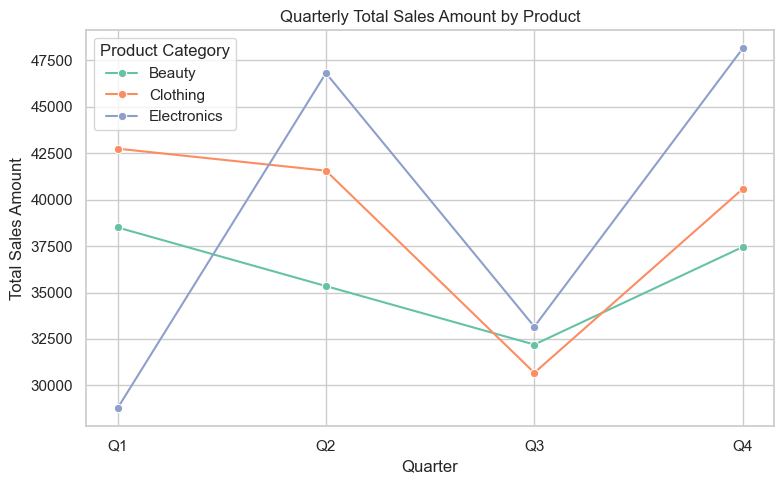

In [77]:
quarter_product_totals =  df.groupby(['Quarter', 'Product Category'])['Total Amount'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=quarter_product_totals, x='Quarter', y='Total Amount', hue='Product Category', marker='o', palette='Set2')

plt.title('Quarterly Total Sales Amount by Product')
plt.xlabel('Quarter')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

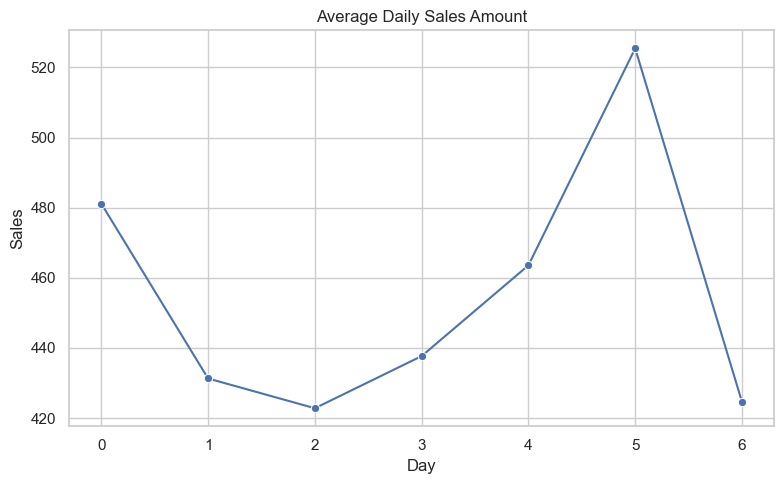

In [82]:
sales_by_dow= df.groupby('Day of Week', observed = True)[['Total Amount']].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(data=sales_by_dow, x='Day of Week', y='Total Amount', marker='o')

plt.title('Average Daily Sales Amount')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

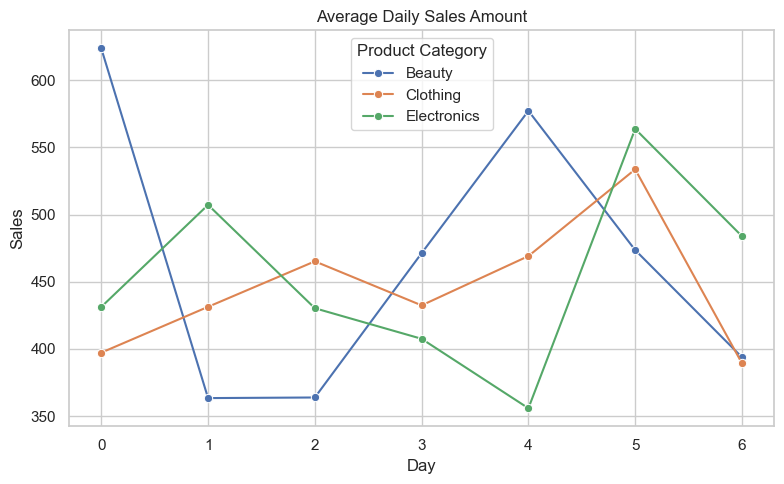

In [85]:
sales_by_dow= df.groupby(['Day of Week','Product Category'], observed = True)[['Total Amount']].mean()

plt.figure(figsize=(8, 5))
sns.lineplot(data=sales_by_dow, x='Day of Week', y='Total Amount', hue= 'Product Category',marker='o')

plt.title('Average Daily Sales Amount')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

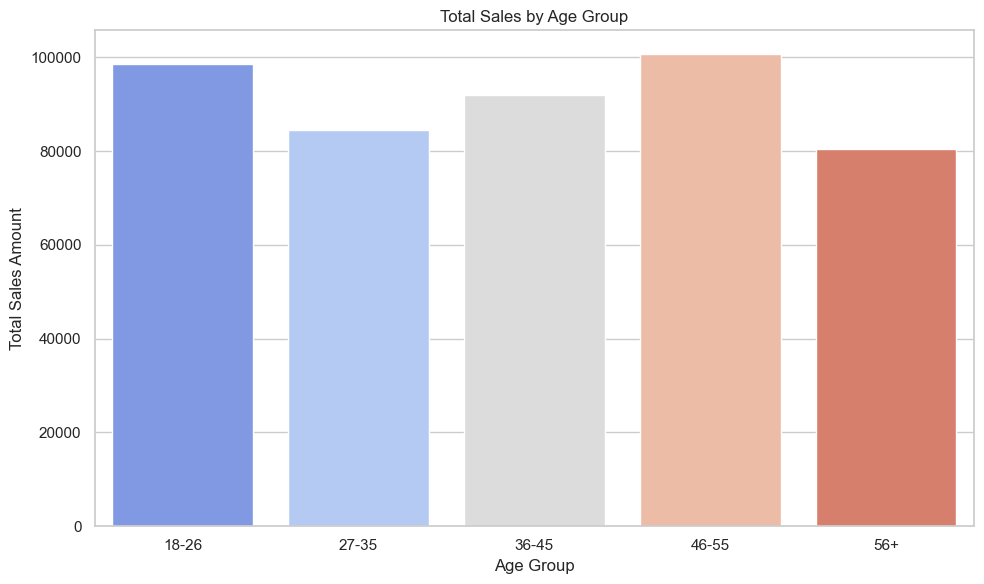

In [87]:
# Group by Age Group and sum Total Amount
total_by_age = df.groupby('Age Group', observed=False)['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_age, x='Age Group', y='Total Amount',hue = 'Age Group', palette='coolwarm')

plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

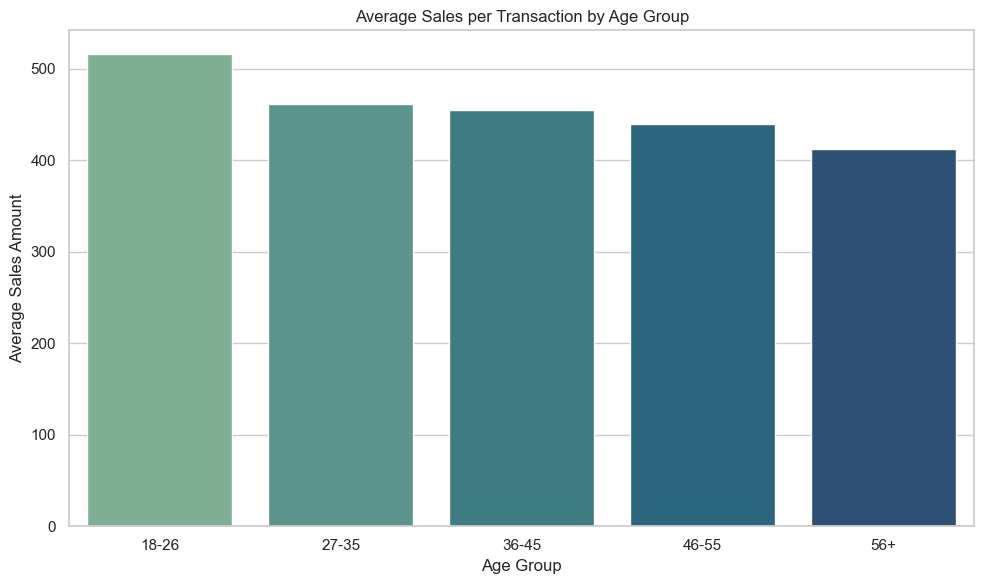

In [89]:
# Group by Age Group and get mean of Total Amount
avg_by_age = df.groupby('Age Group', observed= False)['Total Amount'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_by_age, x='Age Group', y='Total Amount',hue = 'Age Group', palette='crest')

plt.title('Average Sales per Transaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Sales Amount')
plt.tight_layout()
plt.show()


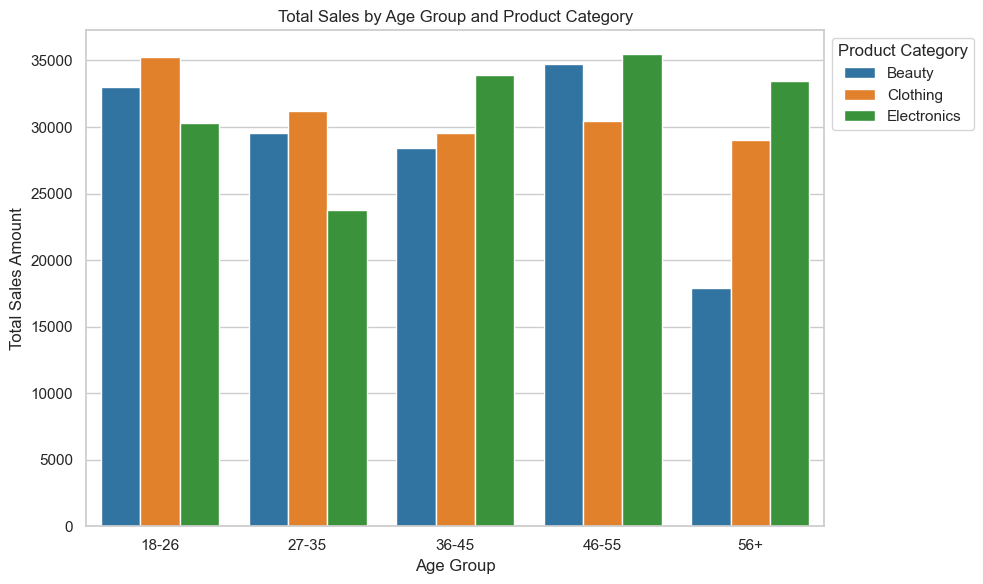

In [94]:
# Group by Age Group and Product Category
age_category_totals = df.groupby(['Age Group', 'Product Category'], observed=False)['Total Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=age_category_totals, x='Age Group', y='Total Amount',
            hue='Product Category', palette='tab10')

plt.title('Total Sales by Age Group and Product Category')
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.legend(title='Product Category', bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

In [96]:
df

,Date,Month,Quarter,Day of Week,Gender,Age,Age Group,Product Category,Quantity,Price per Unit,Total Amount
0,2023-01-01,Jan,Q1,6,Male,46,46-55,Beauty,3,500,1500
1,2023-01-01,Jan,Q1,6,Male,41,36-45,Clothing,3,300,900
2,2023-01-01,Jan,Q1,6,Female,40,36-45,Clothing,4,300,1200
3,2023-01-02,Jan,Q1,0,Male,19,18-26,Electronics,3,30,90
4,2023-01-02,Jan,Q1,0,Female,19,18-26,Beauty,1,25,25
...,...,...,...,...,...,...,...,...,...,...,...
995,2023-12-29,Dec,Q4,4,Female,51,46-55,Beauty,2,300,600
996,2023-12-29,Dec,Q4,4,Female,30,27-35,Beauty,3,500,1500
997,2023-12-31,Dec,Q4,6,Male,60,56+,Electronics,2,25,50
998,2024-01-01,Jan,Q1,0,Male,42,36-45,Beauty,3,500,1500
